In [9]:
import pandas as pd
import re

# Initialize lists to store the dates and texts
dates = []
texts = []

# Initialize variables to hold the current date and text
current_date = None
current_text = ""

# Open the file
with open('data/Delozio Texts.txt', 'r') as file:
    # Iterate through each line in the file
    for line in file:
        # If the line matches the date format, start a new entry
        if re.match(r"[A-Za-z]{3} \d{1,2}, \d{4}", line):
            # If there's a current date, it means we've reached a new date and should finish the previous entry
            if current_date is not None:
                dates.append(current_date)
                texts.append(current_text.strip())
            # Start a new entry with this line as the date and an empty text
            current_date = line.strip()
            current_text = ""
        # If the line is a delimiter, end the current entry
        elif line.strip() == "|":
            # Append the current date and text to the lists
            dates.append(current_date)
            texts.append(current_text.strip())
            # Reset the current date and text
            current_date = None
            current_text = ""
        # If the line is part of a text, add it to the current text
        else:
            current_text += line

# Create a DataFrame from the dates and texts
df_texts = pd.DataFrame({
    'date': dates,
    'text': texts
})

df_texts


,date,text
0,"Nov 8, 2022",I am honored and grateful that the people of #...
1,"Nov 8, 2022","Polls are now open, #PA17! I’m out here at the..."
2,"Nov 8, 2022","The sun might have went down, but we are still..."
3,"Nov 8, 2022",I ended the day at the polls at the place wher...
4,"Nov 8, 2022",Western PA made me the man I am today. From st...
...,...,...
512,"Jun 16, 2022",This campaign is all about building and making...
513,"Jun 15, 2022","Record profits for Big Oil, on the backs of ha..."
514,"Jun 14, 2022",This Navy guy wishes the U.S. Army a happy bir...
515,"Jun 14, 2022",Today #PA17 was named a top-priority race in t...


In [10]:
df_texts.to_csv('Delozio_Tweets.csv')

In [13]:
# make lists to store separated dates from text
dates = []
texts = []

# Initialize variables to hold the current date and text
current_date = None
current_text = ""

# Open t
with open('data/MGT_tweets.txt', 'r') as file:
    # Iterate through each line in the file
    for line in file:
        # If the line matches date format, start a new entry
        if re.match(r"[A-Za-z]{3} \d{1,2}, \d{4}", line):
            # If there's a current date, it means we've reached a new date and should finish the previous entry
            if current_date is not None:
                dates.append(current_date)
                texts.append(current_text.strip())
            # Start a new entry with this line as the date and an empty text
            current_date = line.strip()
            current_text = ""
        # If the line is a delimiter, end the current entry
        elif line.strip() == "|":
            # Append the current date and text to the lists
            dates.append(current_date)
            texts.append(current_text.strip())
            # Reset the current date and text
            current_date = None
            current_text = ""
        # If the line is part of a text, add it to the current text
        else:
            current_text += line

# turn into a dataframe
mgp_texts = pd.DataFrame({
    'date': dates,
    'text': texts
})

mgp_texts


,date,text
0,"Sep 23, 2022",I am:\n\n👷‍♂️Pro-worker\n🏠 Pro-family\n💪 Pro-t...
1,"Sep 23, 2022",🚨 Volunteer Alert 🚨 \n\nJoin me this weekend t...
2,"Sep 23, 2022",Dark money has no place in our democracy. It’s...
3,"Sep 23, 2022",Chip in to elect someone who will keep big mon...
4,"Sep 22, 2022",In 2020 I miscarried and needed immediate medi...
...,...,...
194,"Apr 8, 2022",History made 💪🏛 Ketanji Brown Jackson will be ...
195,"Apr 5, 2022","""Political elites are out of tune with working..."
196,"Mar 30, 2022",I'd love to see you tonight at our virtual rec...
197,"Mar 24, 2022",This is exactly why I'm not taking any money f...


In [14]:
mgp_texts.to_csv('MGP_Tweets_b4Sept.csv')

In [16]:
mgp_tweets = pd.read_csv('data/mgptweets.csv')

In [17]:
# only keeping 'created_at' and 'text' columns
mgp_tweets = mgp_tweets[['created_at', 'text']]

# Rename 'created_at' to 'date'
mgp_tweets.rename(columns={'created_at': 'date'}, inplace=True)

# convert 'date' to datetime object
mgp_tweets['date'] = pd.to_datetime(mgp_tweets['date']).dt.tz_localize(None)

# filter dates between Nov 18, 2022 and Sep 24, 2022 (announcement to election)
start_date = pd.to_datetime("2022-09-23")
end_date = pd.to_datetime("2022-11-09")
mgp_tweets = mgp_tweets[(mgp_tweets['date'] >= start_date) & (mgp_tweets['date'] <= end_date)]

# Format 'date' to 'MMM D, YYYY'
mgp_tweets['date'] = mgp_tweets['date'].dt.strftime('%b %d, %Y')

# Display the first few rows of the dataframe
mgp_tweets.head()


,date,text
105,"Nov 08, 2022","From Pacific County, to my home in Skamania an..."
106,"Nov 08, 2022",We’ll be making calls online &amp; in person s...
107,"Nov 08, 2022",For everyone who has pitched in to make our ca...
108,"Nov 08, 2022",Comparing your weird rally to January 6th is n...
109,"Nov 08, 2022",If you want to get to know me and what I stand...


In [21]:
# Now, let's append the previous dataframe to the new one
combined_df = pd.concat([mgp_tweets, mgp_texts], ignore_index=True)

# Display the first few rows of the combined dataframe
combined_df


,date,text
0,"Nov 08, 2022","From Pacific County, to my home in Skamania an..."
1,"Nov 08, 2022",We’ll be making calls online &amp; in person s...
2,"Nov 08, 2022",For everyone who has pitched in to make our ca...
3,"Nov 08, 2022",Comparing your weird rally to January 6th is n...
4,"Nov 08, 2022",If you want to get to know me and what I stand...
...,...,...
389,"Apr 8, 2022",History made 💪🏛 Ketanji Brown Jackson will be ...
390,"Apr 5, 2022","""Political elites are out of tune with working..."
391,"Mar 30, 2022",I'd love to see you tonight at our virtual rec...
392,"Mar 24, 2022",This is exactly why I'm not taking any money f...


In [22]:
combined_df.to_csv('mgp_full_tweets.csv')

# MGP

In [23]:
mgp_tweets = pd.read_csv('data/mgp_full_tweets.csv')

In [25]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Download stopwords
nltk.download('stopwords')

# def preprocess function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

# Preprocess the text
mgp_tweets['processed_text'] = mgp_tweets['text'].apply(preprocess_text)

# Display the dataframe
mgp_tweets.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/forrestwilliams/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,date,text,processed_text
0,0,"Nov 08, 2022","From Pacific County, to my home in Skamania an...",pacific county home skamania everywhere voter ...
1,1,"Nov 08, 2022",We’ll be making calls online &amp; in person s...,we’ll making call online amp person starting 4...
2,2,"Nov 08, 2022",For everyone who has pitched in to make our ca...,everyone pitched make campaign strong today i’...
3,3,"Nov 08, 2022",Comparing your weird rally to January 6th is n...,comparing weird rally january 6th dunk think b...
4,4,"Nov 08, 2022",If you want to get to know me and what I stand...,want get know stand watch video i’m candidate ...


In [55]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=5, max_features=1000)

# Vectorize the processed text
text_vectorized = vectorizer.fit_transform(mgp_tweets['processed_text'])

# Initialize an LDA model
lda_model = LatentDirichletAllocation(n_components=6, random_state=1)

# Fit the LDA model on the vectorized text
lda_model.fit(text_vectorized)


LatentDirichletAllocation(n_components=6, random_state=1)

In [56]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(lda_model, vectorizer.get_feature_names_out(), 10)


Topic #0: get people fight working congress right need care voice like
Topic #1: thank sign join volunteer day vancouver ballot rsvp longview campaign
Topic #2: kent joe wa03 debate want think abortion support watch republican
Topic #3: family work congress working rt bring business small mgpforcongress living
Topic #4: flip wa03 help keep need real campaign kent blue seat
Topic #5: joe kent re right year say thank voting want we



In [57]:
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % topic_idx)
    # Get the importance of each word for this topic
    importance = topic / topic.sum()
    # Get the most important words and their importance
    words_importance = [(feature_names[i], importance[i]) for i in importance.argsort()[:-11:-1]]
    for word, importance in words_importance:
        print(f"{word}: {importance}")


Topic #0:
get: 0.028295101001045368
people: 0.025366514656176307
fight: 0.02352777188154508
working: 0.022402075357856356
congress: 0.020526219008940534
right: 0.01834608969742107
need: 0.01826745577216304
care: 0.017449342952922785
voice: 0.01696321740299489
like: 0.016608094321600958
Topic #1:
thank: 0.02825686290682171
sign: 0.024813014808821657
join: 0.024751716830039065
volunteer: 0.023519403746606517
day: 0.021809185731110722
vancouver: 0.020929882191550744
ballot: 0.020254781831855417
rsvp: 0.019634032974741412
longview: 0.018340013256297673
campaign: 0.017303424542856213
Topic #2:
kent: 0.0681522271673092
joe: 0.06265321062491525
wa03: 0.024409287397216792
debate: 0.02290511967570183
want: 0.019602928593768162
think: 0.017960404990825372
abortion: 0.016761951154469188
support: 0.014135572582596118
watch: 0.013512911228015727
republican: 0.013017733479463674
Topic #3:
family: 0.039630955570226514
work: 0.03342081307608699
congress: 0.03226246555373022
working: 0.0313318458306728

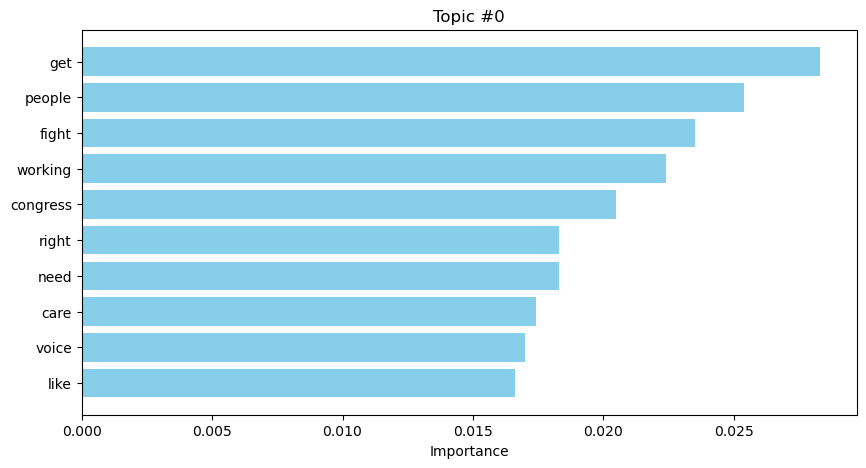

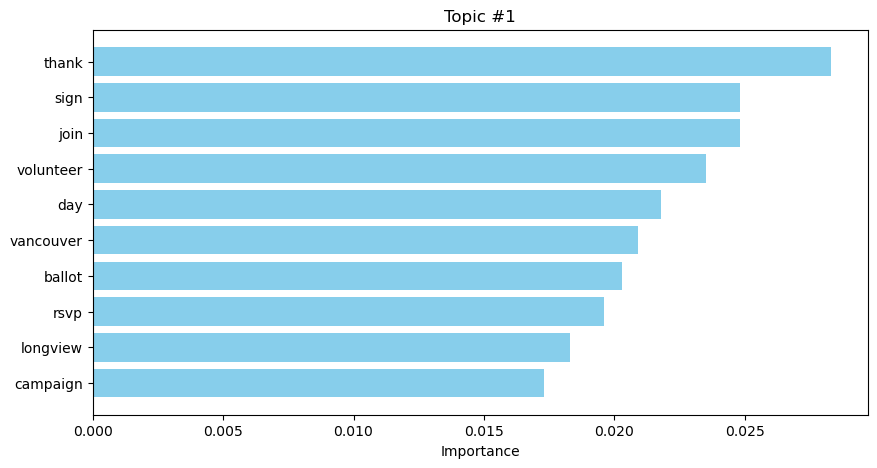

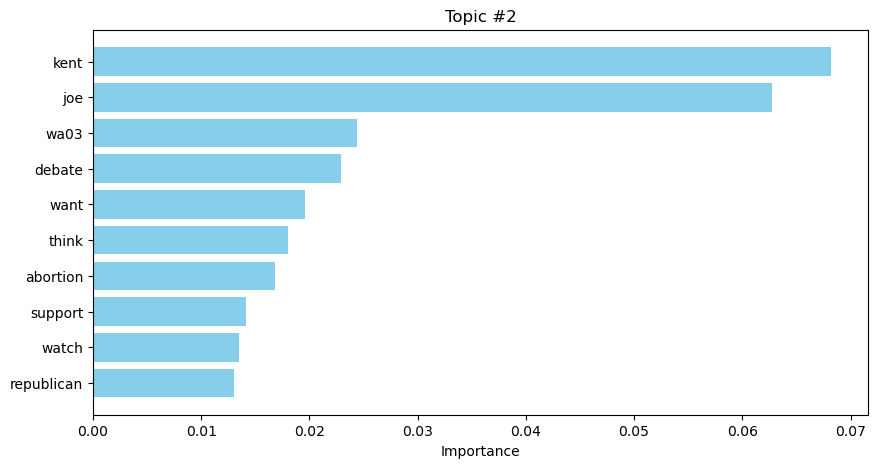

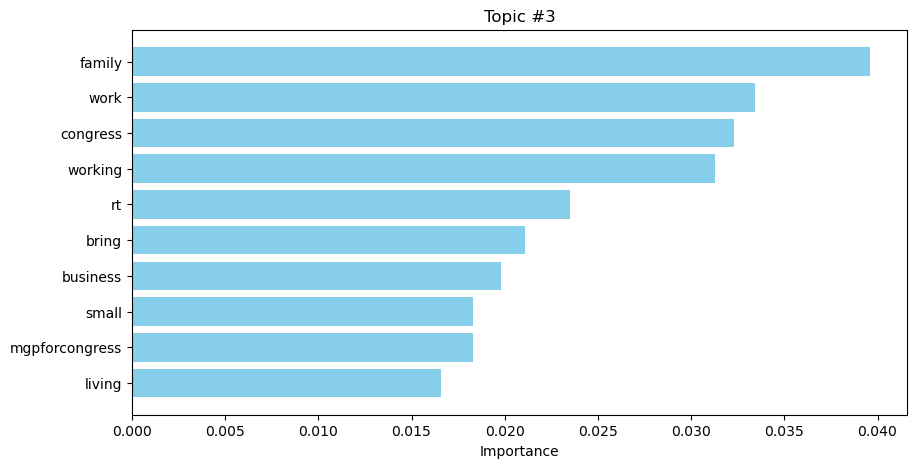

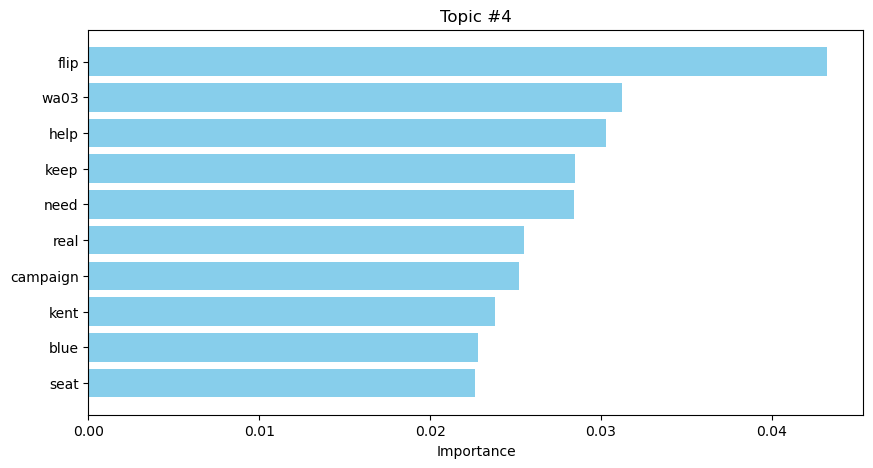

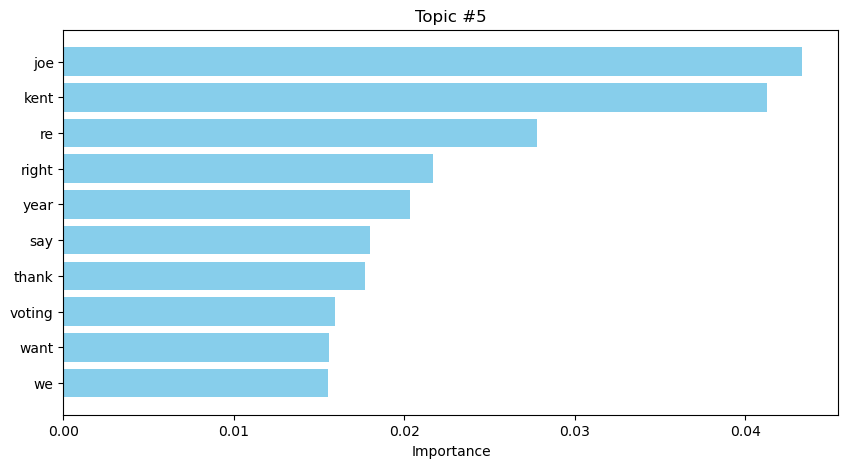

In [58]:
import matplotlib.pyplot as plt

# Define topics and their word importances
topics_words = {
    "Topic #0": {"get": 0.0283, "people": 0.0254, "fight": 0.0235, "working": 0.0224, "congress": 0.0205, "right": 0.0183, "need": 0.0183, "care": 0.0174, "voice": 0.0170, "like": 0.0166},
    "Topic #1": {"thank": 0.0283, "sign": 0.0248, "join": 0.0248, "volunteer": 0.0235, "day": 0.0218, "vancouver": 0.0209, "ballot": 0.0203, "rsvp": 0.0196, "longview": 0.0183, "campaign": 0.0173},
    "Topic #2": {"kent": 0.0682, "joe": 0.0627, "wa03": 0.0244, "debate": 0.0229, "want": 0.0196, "think": 0.0180, "abortion": 0.0168, "support": 0.0141, "watch": 0.0135, "republican": 0.0130},
    "Topic #3": {"family": 0.0396, "work": 0.0334, "congress": 0.0323, "working": 0.0313, "rt": 0.0235, "bring": 0.0211, "business": 0.0198, "small": 0.0183, "mgpforcongress": 0.0183, "living": 0.0166},
    "Topic #4": {"flip": 0.0432, "wa03": 0.0312, "help": 0.0303, "keep": 0.0285, "need": 0.0284, "real": 0.0255, "campaign": 0.0252, "kent": 0.0238, "blue": 0.0228, "seat": 0.0226},
    "Topic #5": {"joe": 0.0433, "kent": 0.0413, "re": 0.0278, "right": 0.0217, "year": 0.0203, "say": 0.0180, "thank": 0.0177, "voting": 0.0159, "want": 0.0156, "we": 0.0155},
}

# Plot a bar chart for each topic
for topic, word_importances in topics_words.items():
    words = list(word_importances.keys())
    importances = list(word_importances.values())
    
    plt.figure(figsize=(10, 5))
    plt.barh(words, importances, color="skyblue")
    plt.xlabel("Importance")
    plt.title(topic)
    plt.gca().invert_yaxis()
    plt.show()


# Deluzio

In [59]:
deluzio_tweets = pd.read_csv('data/Delozio_Tweets.csv')

In [60]:
# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Download stopwords
nltk.download('stopwords')

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

# Preprocess the text
deluzio_tweets['processed_text'] = deluzio_tweets['text'].apply(preprocess_text)

# Display the dataframe
deluzio_tweets.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/forrestwilliams/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,date,text,processed_text
0,0,"Nov 8, 2022",I am honored and grateful that the people of #...,honored grateful people pa17 elected next cong...
1,1,"Nov 8, 2022","Polls are now open, #PA17! I’m out here at the...",poll open pa17 i’m poll aliquippa greeting fol...
2,2,"Nov 8, 2022","The sun might have went down, but we are still...",sun might went still poll pa17 go vote 🗳
3,3,"Nov 8, 2022",I ended the day at the polls at the place wher...,ended day poll place began thornburg grew lear...
4,4,"Nov 8, 2022",Western PA made me the man I am today. From st...,western pa made man today stepping serve count...


In [61]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)

# Vectorize the processed text
text_vectorized = vectorizer.fit_transform(deluzio_tweets['processed_text'])

# Initialize an LDA model
lda_model = LatentDirichletAllocation(n_components=7, random_state=1)

# Fit the LDA model on the vectorized text
lda_model.fit(text_vectorized)


LatentDirichletAllocation(n_components=7, random_state=1)

In [62]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(lda_model, vectorizer.get_feature_names_out(), 10)


Topic #0: pa17 right abortion opponent want freedom ban extremist protect pa
Topic #1: china like act corporation job american pa17 infrastructure power million
Topic #2: pa17 western pa corporate bring corporation fight take working job
Topic #3: pa17 today great teamdeluzio folk day union fight ready across
Topic #4: pa17 good common fight day join congress working across httpsmobilizeuschrisforpa
Topic #5: corporate need like country people dont today em union pa
Topic #6: stuff make job fight right corporate union pa worker pa17



In [63]:
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % topic_idx)
    # Get the importance of each word for this topic
    importance = topic / topic.sum()
    # Get the most important words and their importance
    words_importance = [(feature_names[i], importance[i]) for i in importance.argsort()[:-11:-1]]
    for word, importance in words_importance:
        print(f"{word}: {importance}")


Topic #0:
pa17: 0.025385799263060796
right: 0.02219098810043511
abortion: 0.019199138062456135
opponent: 0.015674591576584875
want: 0.01448077326648099
freedom: 0.013896246523924648
ban: 0.013354735751992091
extremist: 0.011544981843796863
protect: 0.011442772035936678
pa: 0.010418261115681428
Topic #1:
china: 0.025444603179761365
like: 0.016219121125995335
act: 0.014016740262809054
corporation: 0.01255108629941817
job: 0.012315885877415155
american: 0.012100883515985176
pa17: 0.01195849992334887
infrastructure: 0.011777359601471896
power: 0.011506876037750588
million: 0.011460037456310797
Topic #2:
pa17: 0.03372244638360092
western: 0.019643755566509605
pa: 0.019363139888905062
corporate: 0.014786524742616372
bring: 0.010719535755093532
corporation: 0.010608798477462097
fight: 0.010333873958585305
take: 0.009976752955661184
working: 0.009016552422731396
job: 0.008985232350935162
Topic #3:
pa17: 0.051538679386682
today: 0.02347747386711268
great: 0.02070486977836451
teamdeluzio: 0.0196

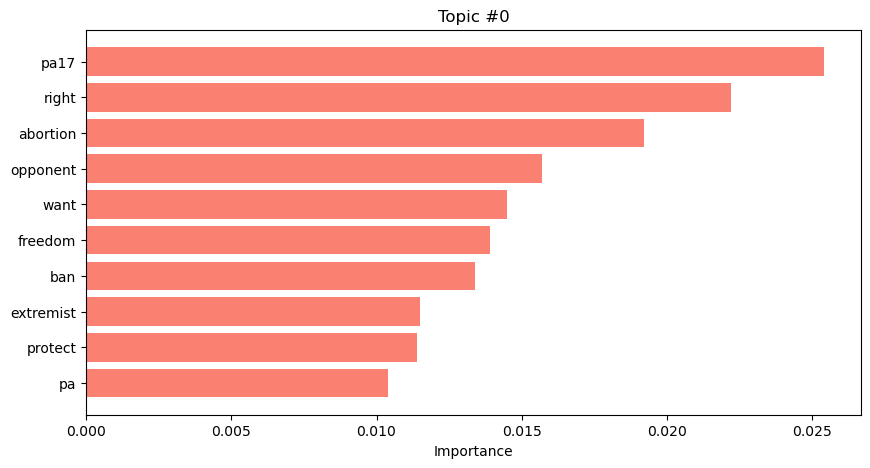

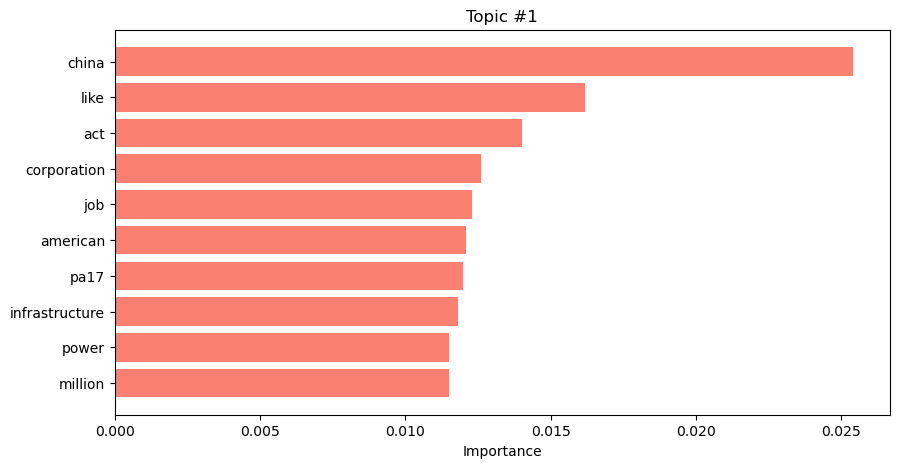

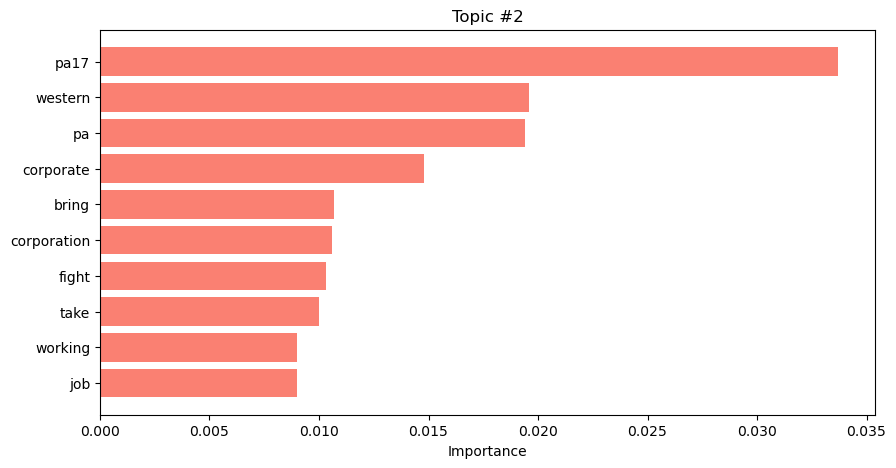

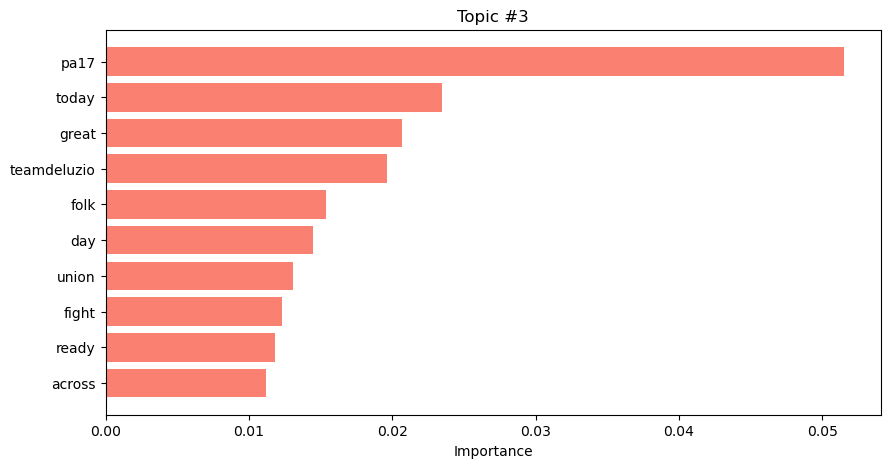

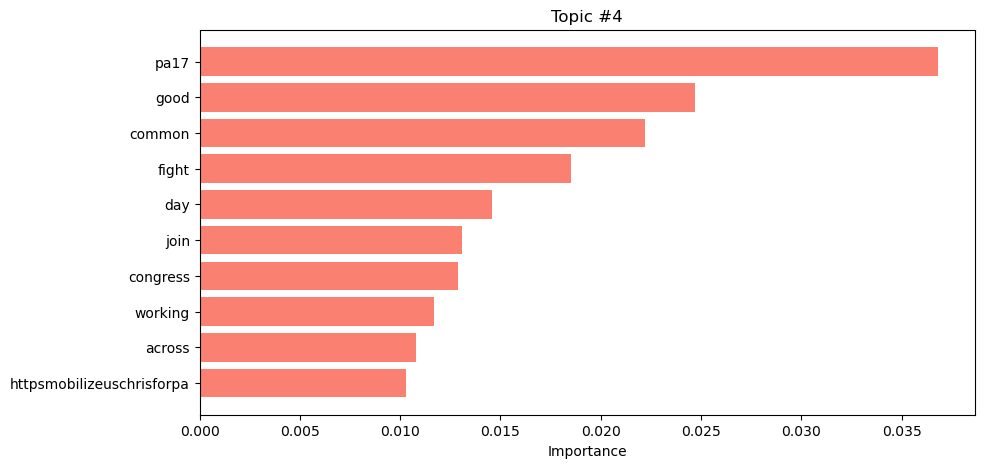

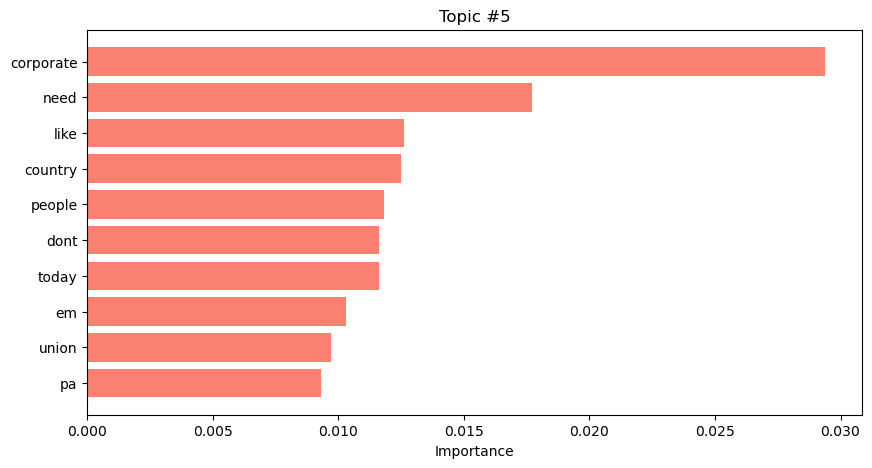

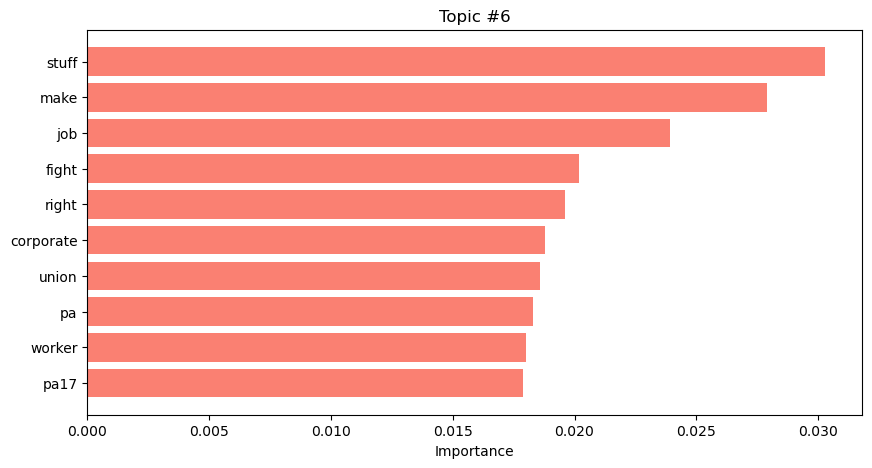

In [64]:
# Define topics and their word importances
topics_words = {
    "Topic #0": {"pa17": 0.0254, "right": 0.0222, "abortion": 0.0192, "opponent": 0.0157, "want": 0.0145, "freedom": 0.0139, "ban": 0.0134, "extremist": 0.0115, "protect": 0.0114, "pa": 0.0104},
    "Topic #1": {"china": 0.0254, "like": 0.0162, "act": 0.0140, "corporation": 0.0126, "job": 0.0123, "american": 0.0121, "pa17": 0.0120, "infrastructure": 0.0118, "power": 0.0115, "million": 0.0115},
    "Topic #2": {"pa17": 0.0337, "western": 0.0196, "pa": 0.0194, "corporate": 0.0148, "bring": 0.0107, "corporation": 0.0106, "fight": 0.0103, "take": 0.0100, "working": 0.0090, "job": 0.0090},
    "Topic #3": {"pa17": 0.0515, "today": 0.0235, "great": 0.0207, "teamdeluzio": 0.0196, "folk": 0.0154, "day": 0.0145, "union": 0.0131, "fight": 0.0123, "ready": 0.0118, "across": 0.0112},
    "Topic #4": {"pa17": 0.0368, "good": 0.0247, "common": 0.0222, "fight": 0.0185, "day": 0.0146, "join": 0.0131, "congress": 0.0129, "working": 0.0117, "across": 0.0108, "httpsmobilizeuschrisforpa": 0.0103},
    "Topic #5": {"corporate": 0.0294, "need": 0.0177, "like": 0.0126, "country": 0.0125, "people": 0.0118, "dont": 0.0116, "today": 0.0116, "em": 0.0103, "union": 0.0097, "pa": 0.0093},
    "Topic #6": {"stuff": 0.0303, "make": 0.0279, "job": 0.0239, "fight": 0.0202, "right": 0.0196, "corporate": 0.0188, "union": 0.0186, "pa": 0.0183, "worker": 0.0180, "pa17": 0.0179},
}

# Plot a bar chart for each topic
for topic, word_importances in topics_words.items():
    words = list(word_importances.keys())
    importances = list(word_importances.values())
    
    plt.figure(figsize=(10, 5))
    plt.barh(words, importances, color="salmon")
    plt.xlabel("Importance")
    plt.title(topic)
    plt.gca().invert_yaxis()
    plt.show()
